# Basic Inference - Object Detection and Pose Estimation on Static Images with YOLO

References: https://docs.ultralytics.com/

In [2]:
#!pip install ultralytics
#!pip install datasets

In [3]:
import ultralytics
from ultralytics import YOLO
from datasets import load_dataset
import matplotlib.pyplot as plt
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Object Detection - Inference on Unseen Data

Here we will download a new dataset that the pretrained model has never seen before, and practice running inference on static images.

More references can be found at: https://docs.ultralytics.com/modes/predict/

In [4]:
# Download the dataset:
# Credit: https://huggingface.co/datasets/keremberke/german-traffic-sign-detection
traffic_ds = load_dataset("keremberke/german-traffic-sign-detection", name="full")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.29k [00:00<?, ?B/s]

german-traffic-sign-detection.py:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/51.4M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/14.3M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/7.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/383 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/108 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/54 [00:00<?, ? examples/s]

In [5]:
# Load the basic YOLOv11 Object Detection Model:
model_detect = YOLO("yolo11s.pt")

100%|██████████| 18.4M/18.4M [00:00<00:00, 275MB/s]



0: 384x640 3 cars, 450.3ms
1: 384x640 15 persons, 7 cars, 450.3ms


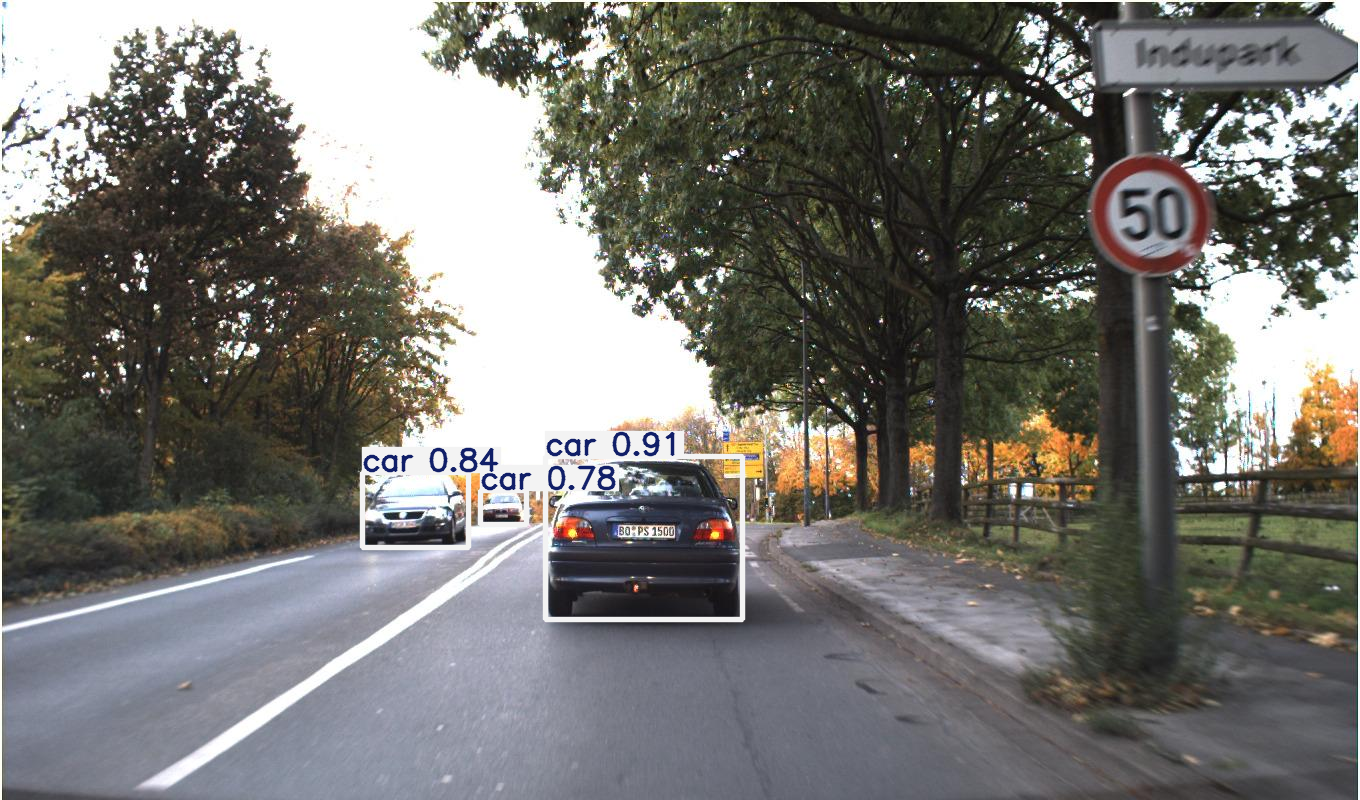

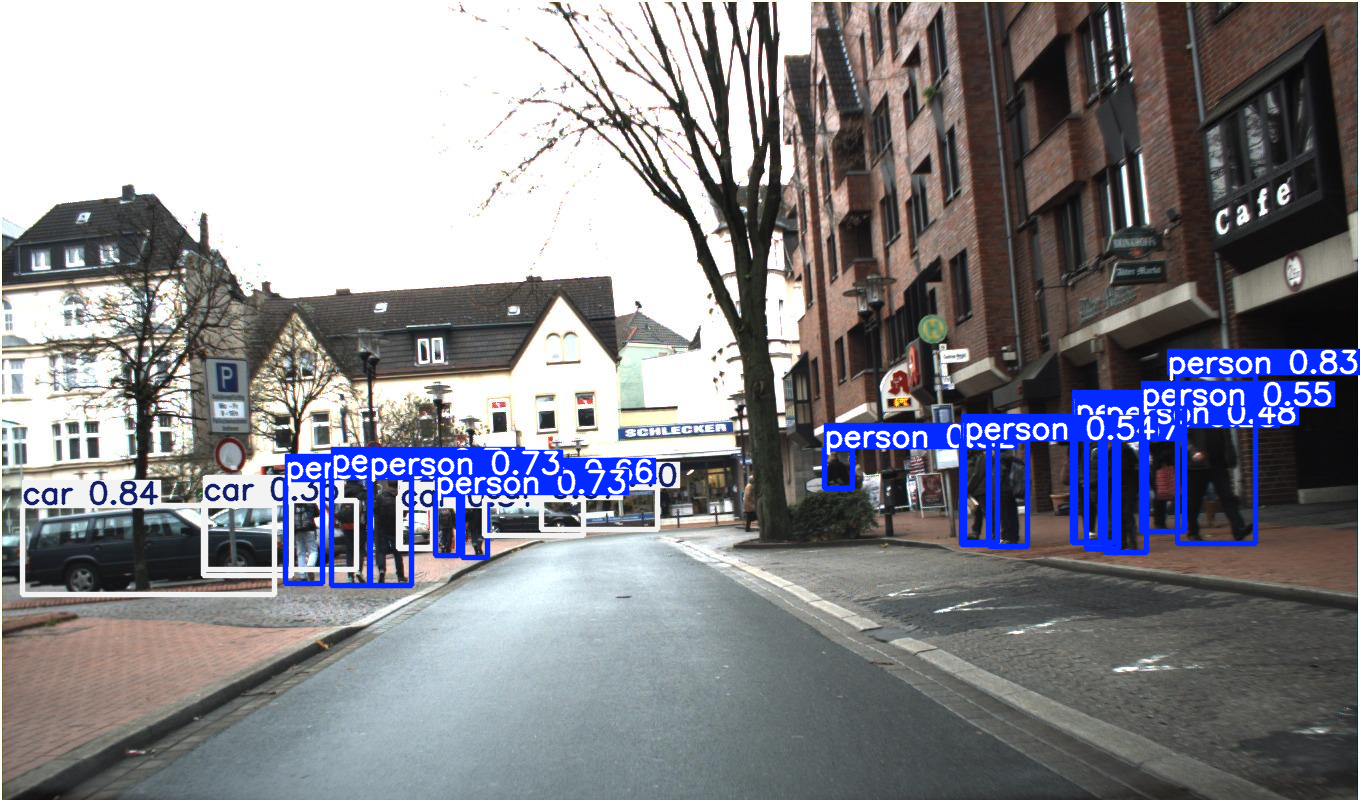

Speed: 18.8ms preprocess, 450.3ms inference, 17.7ms postprocess per image at shape (1, 3, 384, 640)


In [6]:
# Define paths for images we want to predict on - these can be local files, web addresses, etc.
# In this case we will designate the 1st and 10th observations from our dataset:
image_path_1 = traffic_ds['train'][0]['image']
image_path_10 = traffic_ds['train'][9]['image']

# Define a generator of results objects:
results = model_detect([image_path_1, image_path_10], stream=True)

# Process results generator
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk

## Inference with Pose Estimation Model:
We can run the same type of inference on static images using a pose estimation model.

https://docs.ultralytics.com/tasks/pose/

In [7]:
# First load the pose detection model:
model_pose = YOLO("yolo11n-pose.pt")

100%|██████████| 5.97M/5.97M [00:00<00:00, 161MB/s]


In [25]:
# We will also load a more relevant dataset:
# Credit: https://huggingface.co/datasets/nihaludeen/sports_classification
pose_ds = load_dataset("nihaludeen/sports_classification")

Resolving data files:   0%|          | 0/105 [00:00<?, ?it/s]


0: 640x640 1 person, 324.4ms
1: 640x640 2 persons, 324.4ms


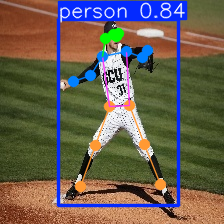

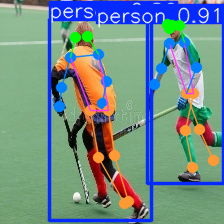

Speed: 7.5ms preprocess, 324.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


In [9]:
# Define paths for images we want to predict on - these can be local files, web addresses, etc.
# In our case we will designate the 13th and 83rd observations from our dataset:
image_path_12 = pose_ds['train'][12]['image']
image_path_82 = pose_ds['train'][82]['image']

# Run batched inference on single image or list of images
#results_pose = model_pose(image_path_12, stream=True)
results_pose = model_pose([image_path_12, image_path_82], stream=True)


# This is a generator object, and we iterate over it to display results:
for result in results_pose:
    boxes = result.boxes  # Boxes object for bounding box outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk


0: 640x640 6 persons, 355.9ms
1: 640x640 14 persons, 355.9ms
2: 640x640 1 person, 355.9ms
3: 640x640 4 persons, 355.9ms
4: 640x640 3 persons, 355.9ms
5: 640x640 1 person, 355.9ms
Speed: 11.5ms preprocess, 355.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


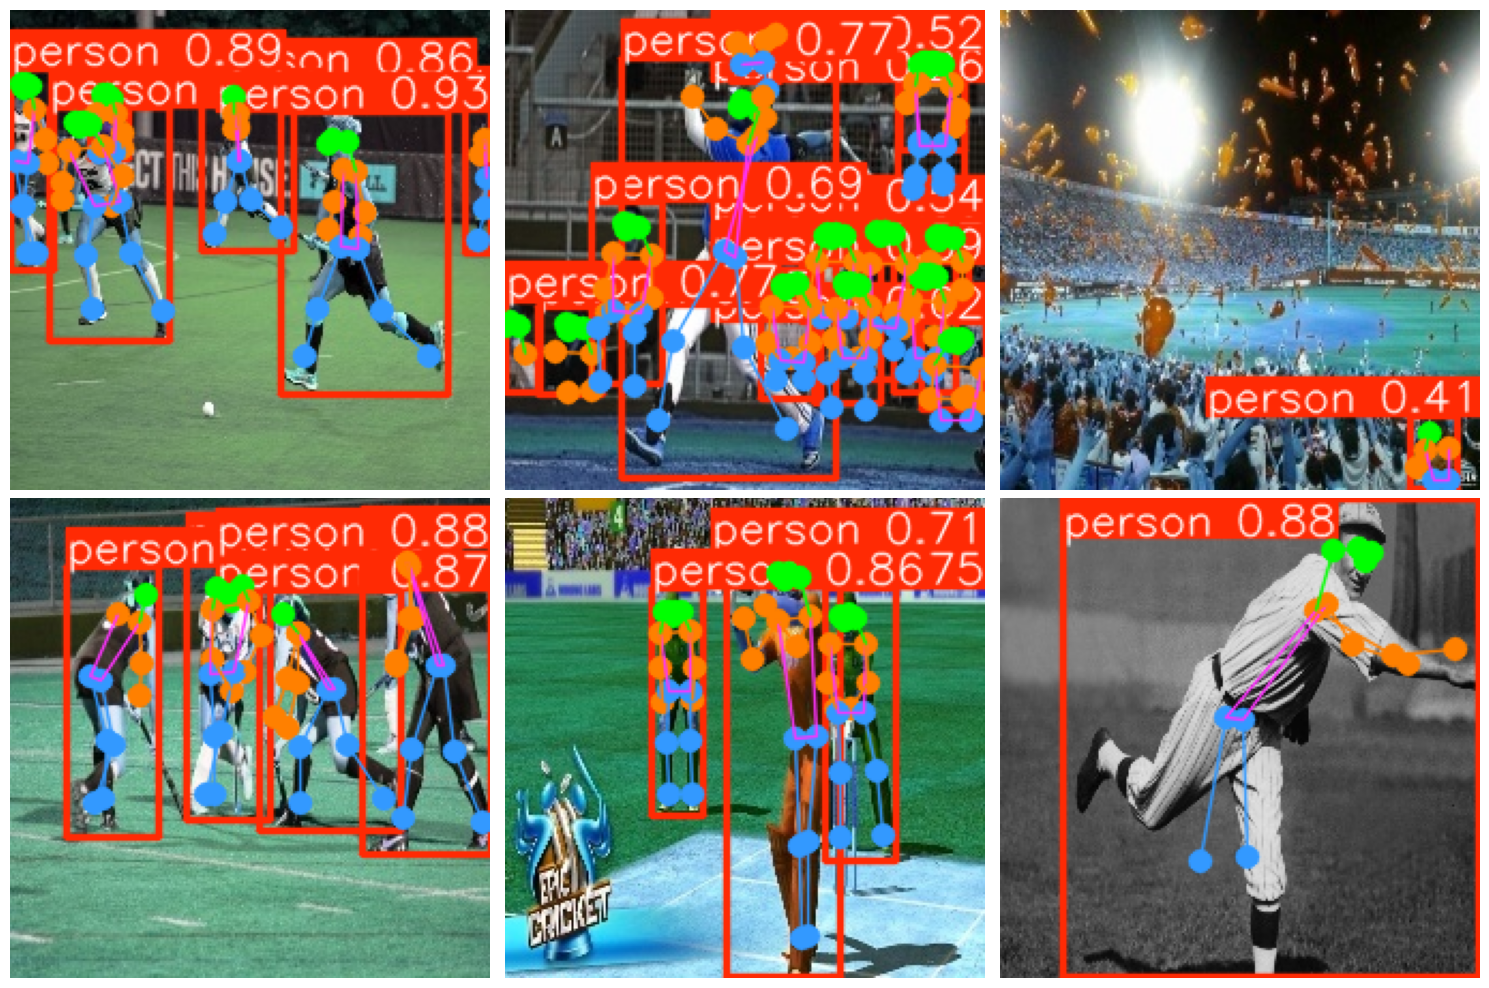

In [11]:
# Print 6 random results from the dataset:

# Randomly select 6 indices and create a list of image paths for the selected indices:
random.seed(42)
random_indices = random.sample(range(len(pose_ds['train'])), 6)
image_paths = [pose_ds['train'][i]['image'] for i in random_indices]

# Run inference on the selected images
results_random = model_pose(image_paths, stream=True)

# Display the results in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, result in enumerate(results_random):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(result.plot())
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


0: 640x640 (no detections), 405.1ms
1: 640x640 4 persons, 405.1ms
2: 640x640 1 person, 405.1ms
3: 640x640 1 person, 405.1ms
4: 640x640 5 persons, 405.1ms
5: 640x640 2 persons, 405.1ms
6: 640x640 1 person, 405.1ms
7: 640x640 3 persons, 405.1ms
8: 640x640 1 person, 405.1ms
9: 640x640 (no detections), 405.1ms
10: 640x640 2 persons, 405.1ms
11: 640x640 2 persons, 405.1ms
12: 640x640 1 person, 405.1ms
13: 640x640 (no detections), 405.1ms
14: 640x640 14 persons, 405.1ms
15: 640x640 1 person, 405.1ms
16: 640x640 7 persons, 405.1ms
17: 640x640 2 persons, 405.1ms
18: 640x640 1 person, 405.1ms
19: 640x640 3 persons, 405.1ms
20: 640x640 (no detections), 405.1ms
21: 640x640 5 persons, 405.1ms
22: 640x640 1 person, 405.1ms
23: 640x640 (no detections), 405.1ms
24: 640x640 4 persons, 405.1ms
25: 640x640 1 person, 405.1ms
26: 640x640 3 persons, 405.1ms
27: 640x640 8 persons, 405.1ms
28: 640x640 (no detections), 405.1ms
29: 640x640 (no detections), 405.1ms
30: 640x640 5 persons, 405.1ms
31: 640x640 1 

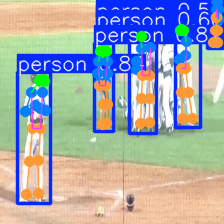

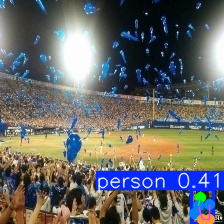

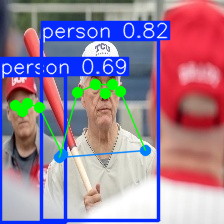

In [24]:
# To run inference on an entire dataset, we can iterate over all of the images:
results_pose_all = model_pose([x['image'] for x in pose_ds['train']], stream=True)

# Convert the generator to a list to enable random sampling
results_pose_all_list = list(results_pose_all)

# Print 3 random results:
# As you will see, while processing the whole dataset at once has obvious benefits,
# it can also make extracting specific observations more time consuming
for _ in range(3):
  random_result = random.choice(results_pose_all_list)
  random_result.show()

As you can see, some of these predictions are better than others, and some are not useful either due to too many predictions per image or issues with the image resolution, etc.

In the following notebooks we will look at several ways to improve upon the out-of-the-box model options, first by augmenting the underlying training data and then by training entirely new models with domain/task-specific datasets.